Mean Happiness Score: 5.53
Median Happiness Score: 5.53

Interpretation: Both mean and median are very close, indicating a fairly symmetric global distribution of happiness scores.

Top 5 Happiest Countries:
 Country name  Ladder score
     Finland         7.842
     Denmark         7.620
 Switzerland         7.571
     Iceland         7.554
 Netherlands         7.464

Bottom 5 Least Happy Countries:
 Country name  Ladder score
     Lesotho         3.512
    Botswana         3.467
      Rwanda         3.415
    Zimbabwe         3.145
 Afghanistan         2.523

Relative Percent Difference between highest and lowest scoring countries: 210.8%

Interpretation: Happiness in the top country (Finland) is about 210.8% higher than the lowest country (Afghanistan). This uses relative percent change.


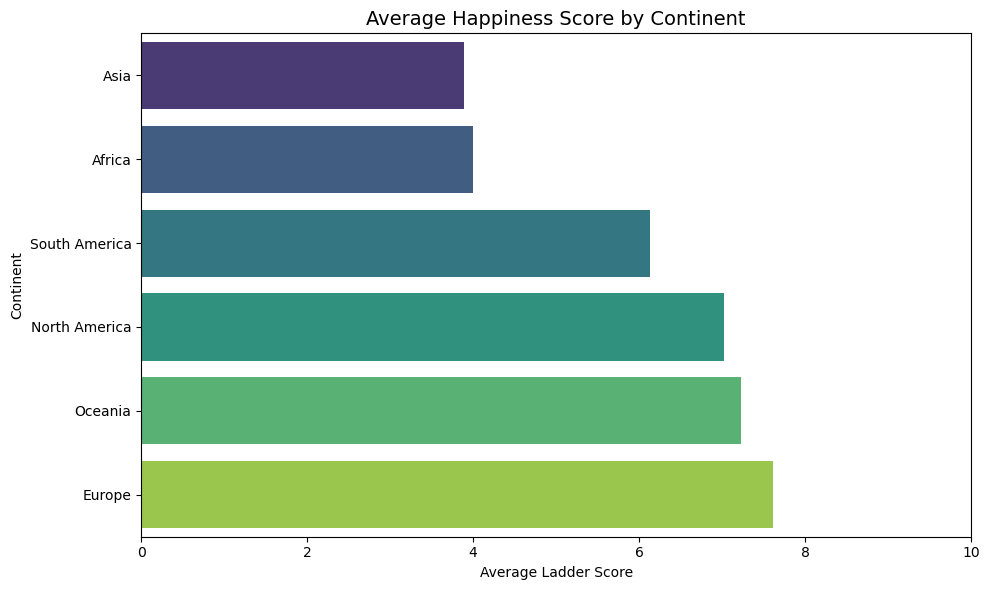


Interpretation: Europe and Oceania have the highest average happiness scores, while Africa has the lowest on average.

Correlation with GDP per capita: 0.79
Correlation with Social support: 0.757
Interpretation: GDP per capita shows a slightly stronger relationship with happiness, indicating economic prosperity or social cohesion are key factors.

Standard Deviation of Happiness Scores by Continent:
 Continent
Asia             1.002055
Africa           0.788916
South America    0.283550
Europe           0.141330
North America    0.107480
Oceania          0.066468
Name: Ladder score, dtype: float64

Interpretation: The continent with the greatest variability in happiness scores is Asia, indicating wider differences among countries in that continent.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# Load dataset
df = pd.read_csv("world-happiness-report-2021.csv")

# If continent column does not exist, create a mapping from country to continent
continent_map = {
    # Africa
    "Zimbabwe":"Africa", "Tanzania":"Africa", "Egypt":"Africa", "South Africa":"Africa",
    # Asia
    "India":"Asia", "Jordan":"Asia", "Cambodia":"Asia", "Afghanistan":"Asia",
    # Europe
    "Finland":"Europe", "Denmark":"Europe", "Switzerland":"Europe",
    "Iceland":"Europe", "Netherlands":"Europe",
    # Oceania
    "Australia":"Oceania", "New Zealand":"Oceania",
    # Americas
    "United States":"North America", "Canada":"North America", "Brazil":"South America",
    "Argentina":"South America"
    # Add more countries as needed
}
df["Continent"] = df["Country name"].map(continent_map)

# ---------------------------
# 1. Descriptive Statistics
# ---------------------------
mean_score = round(df["Ladder score"].mean(), 2)
median_score = round(df["Ladder score"].median(), 2)
print(f"Mean Happiness Score: {mean_score}")
print(f"Median Happiness Score: {median_score}")

print("\nInterpretation: Both mean and median are very close, indicating a fairly symmetric global distribution of happiness scores.")

# ---------------------------
# 2. Ranking Analysis
# ---------------------------
sorted_df = df.sort_values(by="Ladder score", ascending=False)

# Top 5
top5 = sorted_df.head(5)[["Country name","Ladder score"]]
print("\nTop 5 Happiest Countries:\n", top5.to_string(index=False))

# Bottom 5
bottom5 = sorted_df.tail(5)[["Country name","Ladder score"]]
print("\nBottom 5 Least Happy Countries:\n", bottom5.to_string(index=False))

# Percent difference (relative percent change)
highest = top5["Ladder score"].max()
lowest = bottom5["Ladder score"].min()
percent_diff = round(((highest - lowest) / lowest) * 100, 1)
print(f"\nRelative Percent Difference between highest and lowest scoring countries: {percent_diff}%")

print("\nInterpretation: Happiness in the top country ({}) is about {:.1f}% higher than the lowest country ({}). This uses relative percent change.".format(
    top5.iloc[0]["Country name"], percent_diff, bottom5.iloc[-1]["Country name"]))

# ---------------------------
# 3. Visualization: Avg Happiness by Continent
# ---------------------------
continent_avg = df.groupby("Continent")["Ladder score"].mean().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=continent_avg.values, y=continent_avg.index, palette="viridis")
plt.title("Average Happiness Score by Continent", fontsize=14)
plt.xlabel("Average Ladder Score")
plt.ylabel("Continent")
plt.xlim(0,10)
plt.tight_layout()
plt.show()

print("\nInterpretation: Europe and Oceania have the highest average happiness scores, while Africa has the lowest on average.")

# ---------------------------
# 4. Correlation Analysis
# ---------------------------
corr_gdp = round(df["Logged GDP per capita"].corr(df["Ladder score"]), 3)
corr_social = round(df["Social support"].corr(df["Ladder score"]), 3)

print(f"\nCorrelation with GDP per capita: {corr_gdp}")
print(f"Correlation with Social support: {corr_social}")

if corr_gdp > corr_social:
    stronger_var = "GDP per capita"
else:
    stronger_var = "Social support"

print(f"Interpretation: {stronger_var} shows a slightly stronger relationship with happiness, indicating economic prosperity or social cohesion are key factors.")

# ---------------------------
# 5. Complexity Extension: Standard Deviation by Continent
# ---------------------------
continent_std = df.groupby("Continent")["Ladder score"].std().sort_values(ascending=False)
print("\nStandard Deviation of Happiness Scores by Continent:\n", continent_std)

print("\nInterpretation: The continent with the greatest variability in happiness scores is {}, indicating wider differences among countries in that continent.".format(continent_std.index[0]))
